In [3]:
import xlrd
import numpy as np
#import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
 
data = xlrd.open_workbook('3.0alpha.xlsx')
sheet = data.sheet_by_index(0)
Density = sheet.col_values(6)
Sugar = sheet.col_values(7)
Res = sheet.col_values(8)
 
# 读取原始数据
X = np.array([Density, Sugar])
# y的尺寸为(17,)
y = np.array(Res)
X = X.reshape(17, 2)
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
result = cross_val_score(model, X, y, cv=kfold)
print(result.mean())

IndexError: list index out of range

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


高斯核：
预测值： [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1]
真实值： [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
支持向量： [11 12 13 14  1  4  5  6  7]
----------------------------------------
线性核：
预测值： [ 1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1]
真实值： [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
支持向量： [ 9 11 12 13 14 16  2  3  4  5  6  7]


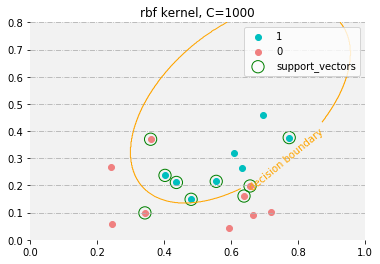

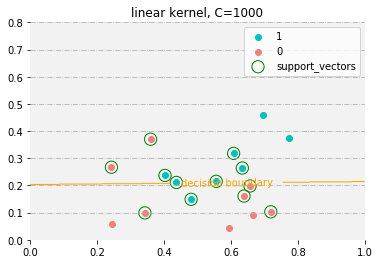

In [7]:
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


def set_ax_gray(ax):
    ax.patch.set_facecolor("gray")
    ax.patch.set_alpha(0.1)
    ax.spines['right'].set_color('none')  # 设置隐藏坐标轴
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.grid(axis='y', linestyle='-.')


def plt_support_(clf, X_, y_, kernel, c):
    pos = y_ == 1
    neg = y_ == -1
    ax = plt.subplot()

    x_tmp = np.linspace(0, 1, 600)
    y_tmp = np.linspace(0, 0.8, 600)

    X_tmp, Y_tmp = np.meshgrid(x_tmp, y_tmp)

    Z_rbf = clf.predict(np.c_[X_tmp.ravel(), Y_tmp.ravel()]).reshape(X_tmp.shape)

    # ax.contourf(X_, Y_, Z_rbf, alpha=0.75)
    cs = ax.contour(X_tmp, Y_tmp, Z_rbf, [0], colors='orange', linewidths=1)
    ax.clabel(cs, fmt={cs.levels[0]: 'decision boundary'})

    set_ax_gray(ax)

    ax.scatter(X_[pos, 0], X_[pos, 1], label='1', color='c')
    ax.scatter(X_[neg, 0], X_[neg, 1], label='0', color='lightcoral')

    ax.scatter(X_[clf.support_, 0], X_[clf.support_, 1], marker='o', c='', edgecolors='g', s=150,
               label='support_vectors')

    ax.legend()
    ax.set_title('{} kernel, C={}'.format(kernel, c))
    plt.show()


path = r'3.0alpha.txt'
data = pd.read_csv(path, delimiter=',', dtype=float)

X = data.iloc[:, [0, 1]].values
y = data.iloc[:, 2].values

y[y == 0] = -1

C = 1000

clf_rbf = svm.SVC(C=C)
clf_rbf.fit(X, y.astype(int))
print('高斯核：')
print('预测值：', clf_rbf.predict(X))
print('真实值：', y.astype(int))
print('支持向量：', clf_rbf.support_)

print('-' * 40)
clf_linear = svm.SVC(C=C, kernel='linear')
clf_linear.fit(X, y.astype(int))
print('线性核：')
print('预测值：', clf_linear.predict(X))
print('真实值：', y.astype(int))
print('支持向量：', clf_linear.support_)

plt_support_(clf_rbf, X, y, 'rbf', C)

plt_support_(clf_linear, X, y, 'linear', C)